## Ejemplos básicos de circuitos cuánticos con quiskit

In [ ]:
# Estas son algunas de las instalaciones que supuestamente debemos haber agregado previamente 
# durante la instalación de qiskit. 
# Quedan aquí señaladas como ejemplo de instalación desde una celda de jupyter notebook. 
 
%pip install qiskit 
%pip install pylatexenc
%pip install "qiskit[visualization ]" --user 
%conda install numpy



Versión de qiskit que estamos usando.

In [5]:
import qiskit
print(qiskit.__version__)

2.1.2


### 1.- Creamos nuestro primer circuito cuántico

Cómo crear registros cuánticos y clásicos, y cómo crear un circuito cuántico con ellos. 
Una vez creado, como dibujar el circuito, vamos a ir añadiendo puertas para ir generando 
cambios en las amplitudes de los qubits iniciales para modelizar el problema que quiero resolver.

In [1]:
# Importamos numpy para manejar arreglos y matrices, y qiskit para crear circuitos cuánticos
# QuantumCircuit es la clase principal para crear circuitos cuánticos en Qiskit
# QuantumRegister y ClassicalRegister son clases para manejar registros cuánticos y clásicos respectivamente

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister 

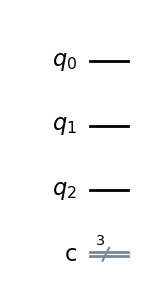

In [2]:
# Primero los registros cuánticos y clásicos
nqr=3 # número de qubits o registros cuánticos
ncr=3 # número de bits o registros clásicos

# creamos los registros cuánticos y clásicos o de medida
qr = QuantumRegister(nqr, name='q')  
cr = ClassicalRegister(ncr, name='c')

# Creamos el circuito cuántico con los registros creados
qc = QuantumCircuit(qr, cr, name='quantum circuit')

qc.draw('mpl')  # Para visualizar el circuito en formato gráfico

#### 1.1.- Le añadimos puertas unitarias: de un solo qubit

Ya tenemos creado el circuito básico. Tengo los qubits y los bit para medir resultados. 

Ahora voy añadiendo puertas para ir generando cambios en las amplitudes de los qubits iniciales para modelizar el problema
que quiero resolver.

Comenzamos con algunas puertas UNITARIAS, de un solo qubit, sin más objetivo que ver como son.**

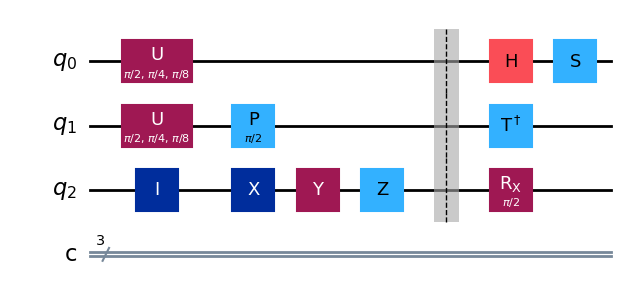

In [3]:
qc= QuantumCircuit(qr, cr, name='quantum circuit')

# Aplicamos una puerta U a los qubits 0 y 1 del registro cuántico utilizamos la libreria numpy.
qc.u(np.pi/2,np.pi/4,np.pi/8,qr[0:2])  
# una puerta U es una puerta cuántica universal que puede representar cualquier operación cuántica
# eso significa que puede ser utilizada para crear cualquier circuito cuántico
# np.pi/2, np.pi/4, np.pi/8 son los ángulos de rotación de la puerta U
# qr[0:2] indica que la puerta U se aplica a los qubits 0 y 1 del registro cuántico
# esto significa que la puerta U se aplica a los dos primeros qubits del circuito cuántico, 0 es el primer qubit 
# y 1 es el segundo qubit, 2 en 0..2 es exclusivo, es deir de 0..2 significa que se aplica a los qubits 0 y 1.

# Aplicamos una puerta de fase a qubit 1
# qc.p sirve para aplicar una puerta de fase a un qubit
# la puerta de fase es una puerta cuántica que aplica una fase a un qubit
# np.pi/2 es el ángulo de rotación de la puerta de fase
# qr[1] indica que la puerta de fase se aplica al qubit 1 del registro cuántico
# pone el vector de estado del qubit 1 en una superposición de estados con la  fase apuntando 
qc.p(np.pi/2, qr[1])  

# Aplicamos qc.id a qubit 2 que es una puerta de identidad
# qc.id es una puerta de identidad que no cambia el estado del qubit
# el efecto de la puerta de identidad es que el qubit 2 permanece en su estado original
qc.id(qr[2])

# Aplicamos puertas Pauli X
qc.x(qr[2])  # Aplica una puerta X a qubit 2, que es una puerta NOT cuántica
qc.y(qr[2])  # Aplica una puerta Y a qubit 2, Y es una puerta de Pauli que aplica una rotación de 180 grados alrededor del eje Y
qc.z(qr[2])  # Aplica una puerta Z a qubit 2 # Z es una puerta de Pauli que aplica una rotación de 180 grados alrededor del eje
 
# Aplicamos una barrera 

qc.barrier(range(nqr)) # Añade una barrera para separar las operaciones anteriores de las siguientes
# se aplica en vertical cruzando los tres qubits.

# Aplicamos una Hadamard al qubit 0
qc.h(qr[0]) # La puerta Hadamard es una puerta cuántica que pone el qubit en una superposición de estados

# Puerta S
qc.s(qr[0]) #sdg que es la puerta S conjugada, puerta de fase que aplica una rotación de 90 grados alrededor del eje Z
# sdg significa la puerta S conjugada, que es la inversa de la puerta S

# Puerta Tdg significa la puerta T conjugada, que es una puerta de fase que aplica una rotación de 45 grados alrededor del eje Z
# tdg significa la puerta T conjugada, que es la inversa de la puerta T
qc.tdg(qr[1]) 

# Rx
qc.rx(np.pi/2, qr[2])  # Aplica una puerta Rx a qubit 2, que es una puerta de rotación alrededor del eje X de  ángulo np.pi/2

# Dibujamos el circuito cuántico
qc.draw('mpl')  # Para visualizar el circuito en formato gráfico

#### 1.2.- Puertas de 2 qubit

Veamos algunos  ejemplos

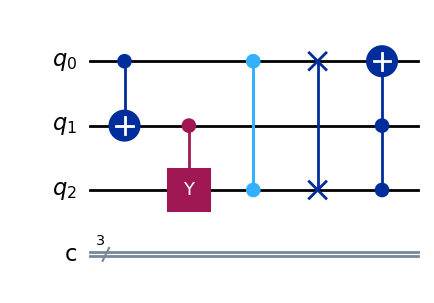

In [4]:
qc2 = QuantumCircuit(qr, cr, name='quantum circuit2')

# CNOT  
qc2.cx(qr[0], qr[1])  # Aplica una puerta CNOT (Control-NOT) entre qubit 0 y qubit 1, q0 control y q1 objetivo
# Si el qubit de control (q0) está en estado |1⟩, la puerta CNOT invertirá el estado del qubit objetivo (q1)

# CY
qc2.cy(qr[1], qr[2])  # Aplica una puerta CY (Control-Y) entre qubit 01 y qubit 2, q1 control y q2 objetivo
# Si el qubit de control (q1) está en estado |1⟩, sobre q2 se aplica una rotación de 180 grados alrededor del eje Y

# CZ    
qc2.cz(qr[2], qr[0])  # Aplica una puerta CZ (Control-Z) entre qubit 2 y qubit 0, q2 control y q0 objetivo
# Si el qubit de control (q2) está en estado |1⟩, la puerta CZ aplicará una rotación de 180 grados alrededor del eje 
# Z al qubit objetivo (q0)

# SWAP
qc2.swap(qr[2], qr[0])  # Intercambia los estados de qubit 2 y qubit 0

# Toffoli
qc2.ccx(qr[1], qr[2], qr[0])  # Aplica una puerta Toffoli (CCX) entre qubit 1, qubit 2 y qubit 0, si qubit 1 y qubit 2 están 
# en estado |1⟩, se invierte el estado del qubit 0

qc2.draw('mpl')  # Para visualizar el circuito en formato gráfico

#### 1.3.- Ejemplo de medición de qubits

Cuando medimos un qubit, obtenemos un resultado binario (0 o 1) que nos dice qué estado está el qubit.
Podemos medir varios qubits simultáneamente y almacenar los resultados en bits clásicos. 
Los resultados se almacenan en los bits clásicos asociados a los qubits medidos.
La medida de un qubit cuántico es una operación irreversible que convierte el estado cuántico del qubit en un estado clásico observable.

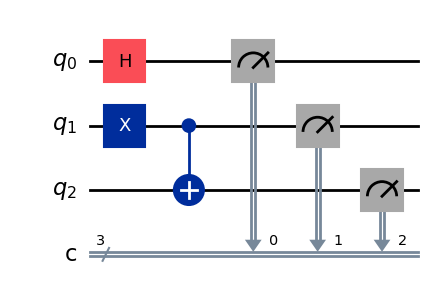

In [7]:
qc3= QuantumCircuit(qr, cr, name='quantum circuit3')
qc3.h(0)
qc3.x(1)
qc3.cx(1,2)  
qc3.measure(qr, cr)  # Medimos los qubits y almacenamos los resultados en los bits clásicos
qc3.draw('mpl')  # Para visualizar el circuito en formato gráfico


In [ ]:
# Este programa no se ha ejecutado por ello no tenemos resultados en los bits clásicos.
print(cr[0],cr[1],cr[2])

<Clbit register=(3, "c"), index=0> <Clbit register=(3, "c"), index=1> <Clbit register=(3, "c"), index=2>


#### 1.4.-  Imaginemos que quisiera cambiar el orden de los bit de registro, los clásicos.

En que bit o registro clásico quiero guardar los resultados de mis medidas. 

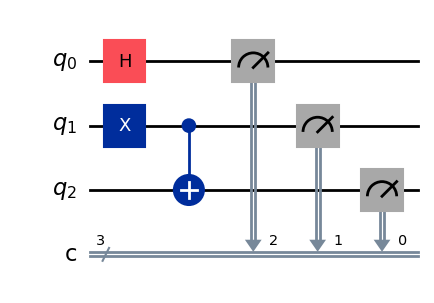

In [22]:
qc4= QuantumCircuit(qr, cr, name='quantum circuit4')
qc4.h(0)
qc4.x(1)
qc4.cx(1,2)  
qc4.measure(qr, cr[::-1])  # Medimos los qubits y almacenamos los resultados en los bits clásicos y cambiamos 
# el orden de los bits clásicos
# ::-1 significa que se invierte el orden de los bits clásicos , literalmente significa desde el último al primero
qc4.draw('mpl')  # Para visualizar el circuito en formato gráfico

####  1.5.- Otra forma de seleccionar como guardar las medidas 

Jugamos con la indización que permite python para indicar los bits clásicos donde quiero guardar los resultados de mis medidas.

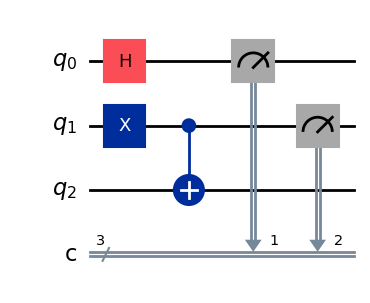

In [23]:
qc5= QuantumCircuit(qr, cr, name='quantum circuit5')
qc5.h(0)
qc5.x(1)
qc5.cx(1,2)  
qc5.measure(qr[0:2], cr[1:])  # El q0 y q1 los medimos y guardamos en los bits clásicos desde el 1 al último, el 2.
qc5.draw('mpl')  # Para visualizar el circuito en formato gráfico

#### 1.6.- Cambiamos un qubit en función de una medición

Podemos decidir sobre que qubit quiero aplicar una puerta dependiendo del resultado de una medición anterior.

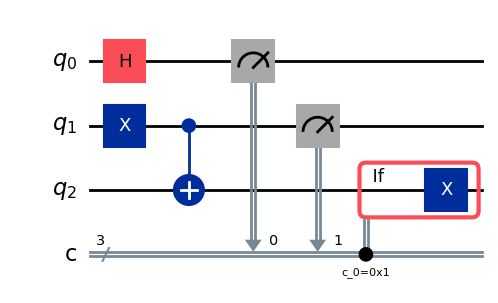

In [ ]:
qc6= QuantumCircuit(qr, cr, name='quantum circuit6')
qc6.h(0)
qc6.x(1)
qc6.cx(1,2)  
qc6.measure(qr[0:2], cr[0:2]) # Medimos y guardamos los qubit desde el 0 al 1, de qbits a bits.add(
#qc6.x(2).c_if(cr[0],1)  # Aplicamos una puerta NOT al qubit2 , si el bit clásico 0 tiene valor 1
# Sustituye el antiguo .c_if(...) por if_test
# if_test es una función que permite realizar una prueba condicional en un circuito cuántico
# si se cumple el if_test se ejecuta la instrucción siguiente, en este caso la puerta NOT al qubit 2
with qc6.if_test((cr[0], 1)):
    qc6.x(2)
    
qc6.draw('mpl')  # Para visualizar el circuito en formato gráfico

#### 1.7.- Inicialización de qubits

Inicializamos los qubits en un estado específico antes de aplicar las puertas cuánticas

Damos una amplitud de probabilidad para cada uno de los posibles estados. Si tenemos 3 qubits tendremos 8 estados.

Daremos entonces una amplitud de probabilidad para el estado 000, 001, 010, 011, 100, 101, 110, 111. 

**Diferencia entre amplitud de probabilidad de un vector y probabilidad de obtener uun estado del sistema**

**Amplitud de probabilidad:** información cuántica completa (fase incluida) de un qubit.

**Probabilidad:** lo que podemos observar al medir, la probabilidad de obtener un estado del sistema

Distintos conjuntos de amplitudes pueden dar la misma distribución de probabilidades, porque la fase relativa no afecta a la probabilidad de medida (pero sí a la interferencia).

**El vector de estado ha de estar normalizado: ** 

Esto significa que la suma de probabilidades de todos los resultados posibles ha de ser igual a 1. 

En el caso de un solo qubit |función de onda del qubit> = a|0> + b|1>  debe cumplir  |a|^2 + |b|^2=1



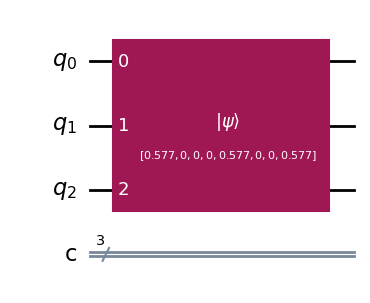

In [29]:
# 1/np.sqrt(3) tiene un valor de 0.5773502691896257
# por tanto tengo 0.57,0,0,0,0.57,0,0,0.57 en el vector de inicialización
# son 8 elementos que corresponden a los 3 qubits, 2^3=8, estableciendo los 
# valores de amplitud de probabilidad para cada estado del sistema cuántico. 
vector=[1/np.sqrt(3),0,0,0,
        1/np.sqrt(3),0,0,1/np.sqrt(3)]  

qc7 = QuantumCircuit(qr, cr, name='quantum circuit7')

qc7.initialize(vector, [qr[0],qr[1],qr[2]])  # Inicializa los qubits en un estado específico utilizando el vector dado
# la función initialize recibe un vector de 8 amplitudes de probabilidad que queremos que se den y lo aplica a los qubits
# como tenemos 3 qubits, el vector tiene 2^3=8 amplitudes de probabilidad porque hay 8 estados posibles.
# El vector de amplitudes de probabilidad debe tener la misma longitud que el número de estados posibles del sistema cuántico
# Estamos dando una amplitud de probabilidad de 1/np.sqrt(3) a los estados |000⟩, |100⟩ y |111⟩,
# y una amplitud de probabilidad de 0 a los estados |001⟩  |010⟩, |011⟩, |101⟩ y |110⟩.
qc7.draw('mpl')  # Para visualizar el circuito en formato gráfico


#### Si es vector no está normalizado dará error

Para normalizarlo tenemos estas  posibilidades: 

Con **(state/np.linalg.norm(state))**

In [30]:
import numpy as np

# vector no normalizado
state = np.array([1,2,3,4,5,6,7,8], dtype=complex)

# normalización
state = state / np.linalg.norm(state)

print("Vector normalizado:", state)
print("Suma de probabilidades:", np.sum(np.abs(state)**2))

Vector normalizado: [0.070014  +0.j 0.14002801+0.j 0.21004201+0.j 0.28005602+0.j
 0.35007002+0.j 0.42008403+0.j 0.49009803+0.j 0.56011203+0.j]
Suma de probabilidades: 0.9999999999999998


O con **Statevector**

In [32]:
from qiskit.quantum_info import Statevector
import numpy as np

# Vector arbitrario
state_raw = np.array([1,2,3,4,5,6,7,8], dtype=complex)

# Normalizar
state_norm = state_raw / np.linalg.norm(state_raw)

# Crear objeto Statevector
psi = Statevector(state_norm)

# Amplitudes
print("Amplitudes:", psi.data)

# Probabilidades
print("Probabilidades:", np.abs(psi.data)**2)

# Comprobación de la suma
print("Suma de probabilidades:", np.sum(np.abs(psi.data)**2))

Amplitudes: [0.070014  +0.j 0.14002801+0.j 0.21004201+0.j 0.28005602+0.j
 0.35007002+0.j 0.42008403+0.j 0.49009803+0.j 0.56011203+0.j]
Probabilidades: [0.00490196 0.01960784 0.04411765 0.07843137 0.12254902 0.17647059
 0.24019608 0.31372549]
Suma de probabilidades: 0.9999999999999998


### 8.- Ejecución de un circuito cuántico con un simulador

In [ ]:
%pip install qiskit-aer

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister 
from qiskit_aer import AerSimulator
from qiskit import transpile

In [2]:
# Primero los registros cuánticos y clásicos
nqr=3 # número de qubits o registros cuánticos
ncr=3 # número de bits o registros clásicos

# creamos los registros cuánticos y clásicos o de medida
qr = QuantumRegister(nqr, name='q')  
cr = ClassicalRegister(ncr, name='c')

# Creamos el circuito cuántico con los registros creados
qc8 = QuantumCircuit(qr, cr, name='quantum circuit8')
qc8.h(0) # Hadamard a qubit 0
qc8.x(1) # Puerta X a qubit 1
qc8.cx(1,2) # Aplicamos una puerta CNOT entre qubit 1 y qubit 2

qc8.measure(qr, cr)  # Medimos los qubits y almacenamos los resultados en los bits clásicos

backend=AerSimulator()
tqc=transpile(qc8, backend)
# transpile es una función que optimiza el circuito cuántico para que sea compatible con el backend seleccionado
job=backend.run(tqc,shots=2000)  # Ejecutamos el circuito en el backend simulado con 2000 repeticiones
result = job.result()  # Obtenemos el resultado del trabajo
counts = result.get_counts(qc8)  # Obtenemos los conteos de las medidas
print("Resultados de las medidas:", counts)  # Imprimimos los resultados de las medidas


Resultados de las medidas: {'111': 992, '110': 1008}


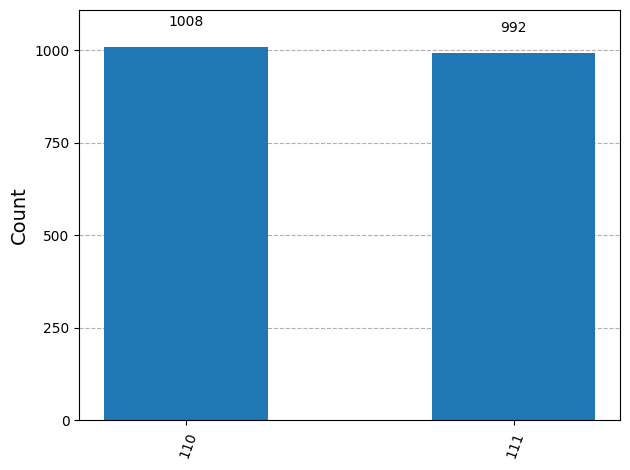

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)  # Visualizamos los resultados de las medidas en un histograma
# plot_histogram es una función que crea un histograma de los resultados de las medidas
# counts es un diccionario que contiene los resultados de las medidas y sus conteos
# El histograma muestra la frecuencia de cada resultado de medida en el circuito cuántico
# Cada barra del histograma representa un resultado de medida y su altura representa el número de veces
# que ese resultado fue medido en las 2000 repeticiones del circuito cuántico

### Seguir con estos vídeos para profundizar un poco más

https://www.youtube.com/watch?v=RXfmP7eaV5s

https://www.youtube.com/watch?v=qxuTMeO69t8